# Heart Disease Prediction

## Necessary Imports for the project

In [83]:
import pandas as pd
from pandas.core.dtypes.common import is_numeric_dtype
import numpy as np
from numpy import dtype
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# Algorithms used
    # Naive bayes
from sklearn.naive_bayes import GaussianNB
    # Logistic Regression
from sklearn.linear_model import LogisticRegression
    # KNN
from sklearn.neighbors import KNeighborsClassifier
    # Decision Tree
from sklearn.tree import DecisionTreeClassifier
    # Random Forest
from sklearn.ensemble import RandomForestClassifier
    # Neural Network
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import sklearn.tree as tree

## Data Preprocessing

### Reading the data from the csv file

In [84]:
df = pd.read_csv("../data/heart_disease.csv", header=0, sep=',')
display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### Data Overview

In [85]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [86]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [87]:
df.shape

(319795, 18)

### Scatterplot matrix of the data

In [88]:
#sb.pairplot(df.dropna(), hue='HeartDisease')

#### Basic Info about the dataframe

In [89]:
variable_list = list(df)
print('Variables in the data: ' + ','.join(variable_list))
print('Size of data: ' + str(len(df)))
print('Number of variables: ' + str(len(variable_list)))
print('number of missing cells on data: ' + str(df.isnull().sum().sum()))
print('Number of equal rows in data: ' + str(len(df)-len(df.drop_duplicates())))

Variables in the data: HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
Size of data: 319795
Number of variables: 18
number of missing cells on data: 0
Number of equal rows in data: 18078


#### Variables Overview (Basic info)

Info for each of the variables, in ase the variable is a number some basic statistic is also taken into account.

##### HeartDisease

INFOR FOR: HeartDisease

Basic info
Type of data: object
Disntinct values: ['No' 'Yes']
Number of disntinct values:2
Number of occurences for values:
No     292422
Yes     27373
Name: HeartDisease, dtype: int64
Percentage of occurence for values:
No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64
number of missing values: 0




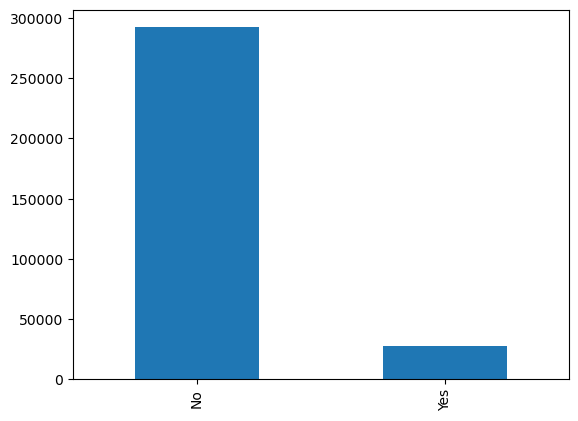

In [90]:
var = 'HeartDisease'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### BMI

INFOR FOR: BMI

Basic info
Type of data: float64
Disntinct values: [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Number of disntinct values:3604
Number of occurences for values:
26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: BMI, Length: 3604, dtype: int64
Percentage of occurence for values:
26.63    1.176379
27.46    0.865242
27.44    0.851483
24.41    0.843040
27.12    0.789568
           ...   
59.85    0.000313
50.59    0.000313
92.53    0.000313
62.95    0.000313
46.56    0.000313
Name: BMI, Length: 3604, dtype: float64
number of missing values: 0


Statistics


Minimum Value: 12.02
Maximum value: 94.85
Range of values: 82.83
Number of zeros: 0
Percentage of zeros: 0.0%
Mean value: 28.325398520927465
Meadian value:27.34
Standard deviation: 6.356100200470739
Coefficient of variation: 0.22439579078736366
Meadian Absolute Deviation (MAD): 4.778336642064467
Skewness: 1.33243064

/tmp/ipykernel_7342/3227346673.py:36: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))


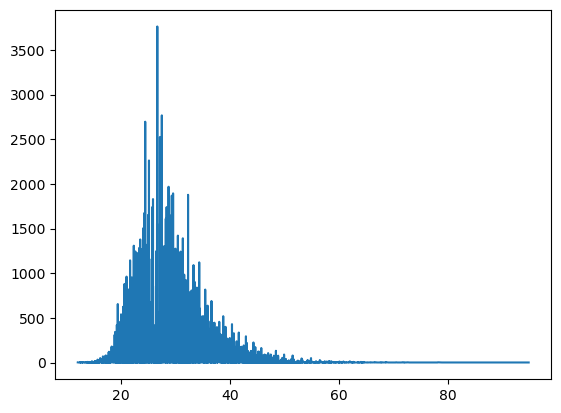

In [91]:
var = 'BMI'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot()

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### Smoking

INFOR FOR: Smoking

Basic info
Type of data: object
Disntinct values: ['Yes' 'No']
Number of disntinct values:2
Number of occurences for values:
No     187887
Yes    131908
Name: Smoking, dtype: int64
Percentage of occurence for values:
No     58.752326
Yes    41.247674
Name: Smoking, dtype: float64
number of missing values: 0




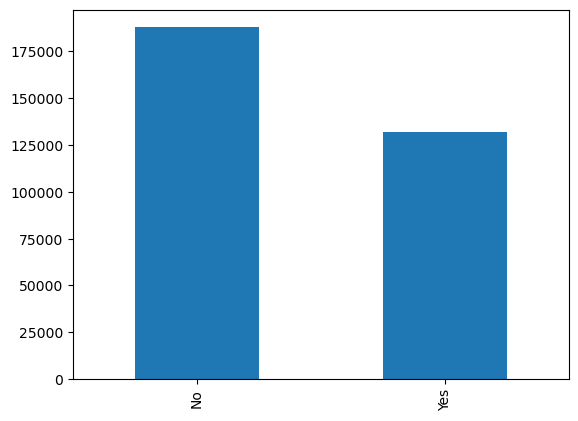

In [92]:
var = 'Smoking'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### AlcoholDrinking

INFOR FOR: AlcoholDrinking

Basic info
Type of data: object
Disntinct values: ['No' 'Yes']
Number of disntinct values:2
Number of occurences for values:
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
Percentage of occurence for values:
No     93.190325
Yes     6.809675
Name: AlcoholDrinking, dtype: float64
number of missing values: 0




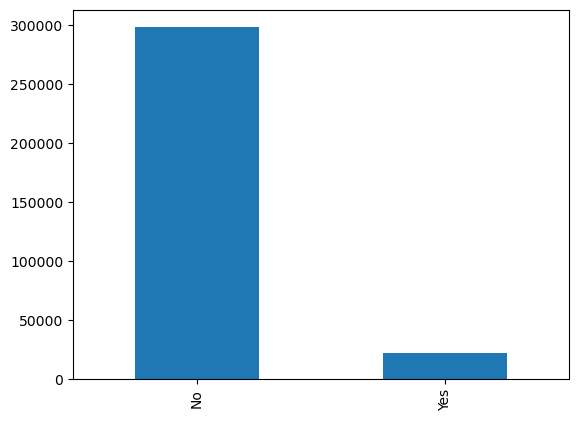

In [93]:
var = 'AlcoholDrinking'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### Stroke

INFOR FOR: Stroke

Basic info
Type of data: object
Disntinct values: ['No' 'Yes']
Number of disntinct values:2
Number of occurences for values:
No     307726
Yes     12069
Name: Stroke, dtype: int64
Percentage of occurence for values:
No     96.22602
Yes     3.77398
Name: Stroke, dtype: float64
number of missing values: 0




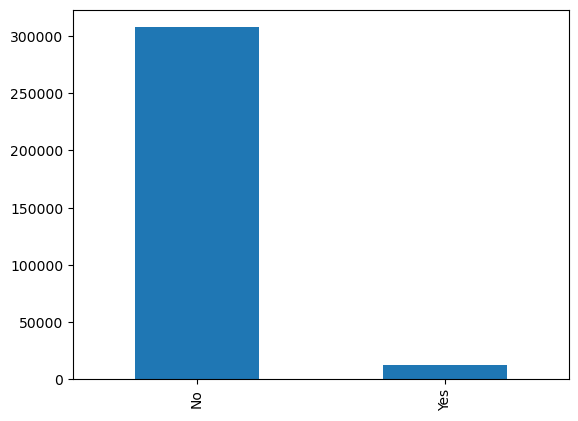

In [94]:
var = 'Stroke'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### PhysicalHealth

INFOR FOR: PhysicalHealth

Basic info
Type of data: float64
Disntinct values: [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
Number of disntinct values:31
Number of occurences for values:
0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: PhysicalHealth, dtype: int64
Percentage of occurence for values:
0.0     70.854454
30.0     6.100471
2.0      4.652981
1.0      3.279914
3.0      2.694539
5.0      2.378399
10.0     1.705155
15.0     1.567254
7.0      1.447490
4.0      1.397145
20.0     1.00564

/tmp/ipykernel_7342/1670881563.py:36: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))


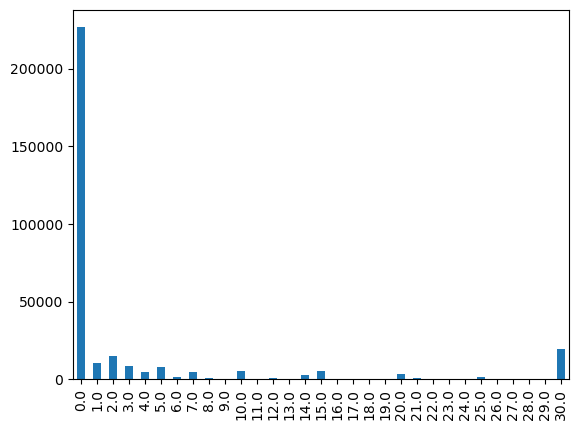

In [95]:
var = 'PhysicalHealth'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### MentalHealth

INFOR FOR: MentalHealth

Basic info
Type of data: float64
Disntinct values: [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
Number of disntinct values:31
Number of occurences for values:
0.0     205401
30.0     17373
2.0      16495
5.0      14149
10.0     10513
3.0      10466
15.0      9896
1.0       9291
7.0       5528
20.0      5431
4.0       5379
14.0      2048
25.0      1954
6.0       1510
8.0       1094
12.0       757
28.0       515
21.0       352
29.0       317
18.0       211
9.0        203
16.0       152
17.0       128
27.0       126
13.0       110
22.0        98
11.0        83
23.0        68
24.0        67
26.0        59
19.0        21
Name: MentalHealth, dtype: int64
Percentage of occurence for values:
0.0     64.228959
30.0     5.432543
2.0      5.157992
5.0      4.424397
10.0     3.287419
3.0      3.272722
15.0     3.094482
1.0      2.905299
7.0      1.728607
20.0     1.698275
4.0      1.682015
14

/tmp/ipykernel_7342/2851752193.py:36: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))


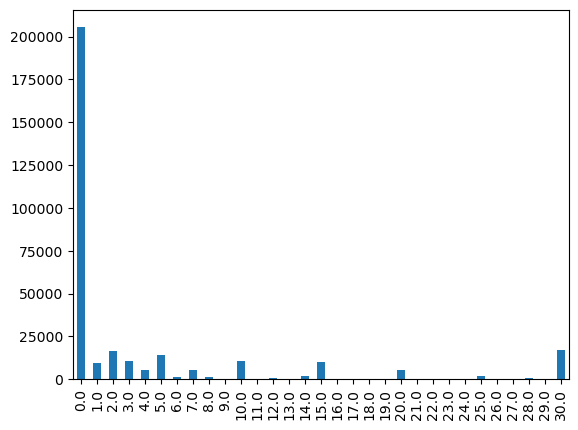

In [96]:
var = 'MentalHealth'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### DiffWalking

This metric is a yes or not that signals if a person has any problems walking (not that a person can't walk but they might have a slower pace than normal, might walk in a funny way, etc.). This is usuallly associated with problems that might change blood circulation thus might signify a heart disease.

INFOR FOR: DiffWalking

Basic info
Type of data: object
Disntinct values: ['No' 'Yes']
Number of disntinct values:2
Number of occurences for values:
No     275385
Yes     44410
Name: DiffWalking, dtype: int64
Percentage of occurence for values:
No     86.112979
Yes    13.887021
Name: DiffWalking, dtype: float64
number of missing values: 0




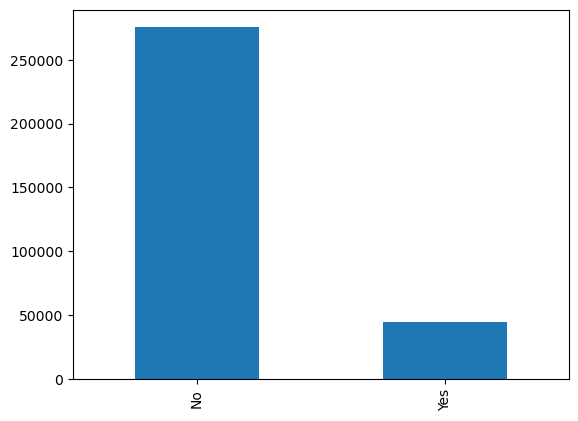

In [97]:
var = 'DiffWalking'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### Sex

INFOR FOR: Sex

Basic info
Type of data: object
Disntinct values: ['Female' 'Male']
Number of disntinct values:2
Number of occurences for values:
Female    167805
Male      151990
Name: Sex, dtype: int64
Percentage of occurence for values:
Female    52.472678
Male      47.527322
Name: Sex, dtype: float64
number of missing values: 0




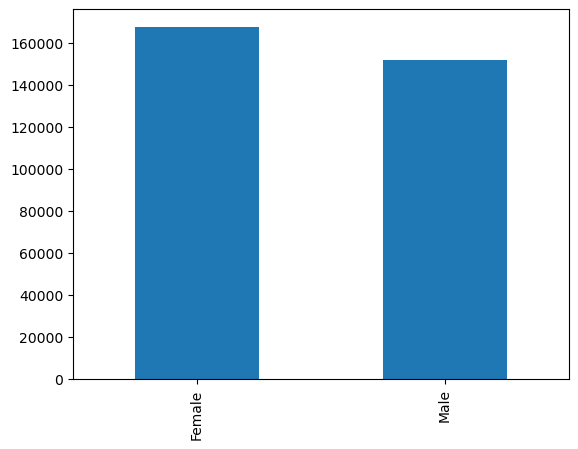

In [98]:
var = 'Sex'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### AgeCategory

INFOR FOR: AgeCategory

Basic info
Type of data: object
Disntinct values: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Number of disntinct values:13
Number of occurences for values:
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64
Percentage of occurence for values:
65-69          10.679029
60-64          10.533623
70-74           9.714036
55-59           9.305024
50-54           7.936960
80 or older     7.552651
45-49           6.814053
75-79           6.717428
18-24           6.586720
40-44           6.568583
35-39           6.425992
30-34           5.864069
25-29           5.301834
Name: AgeCategory, dtype: float64
number of missing values: 0




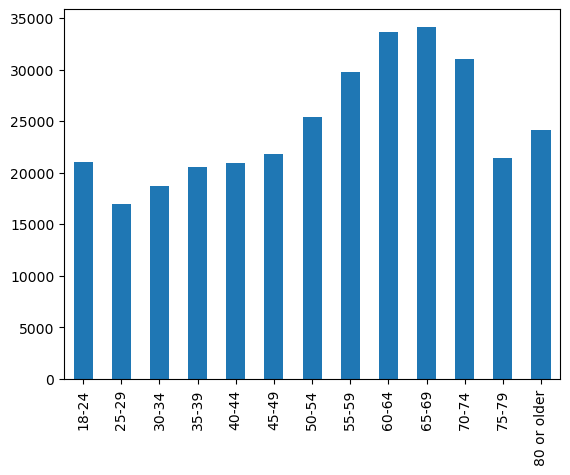

In [99]:
var = 'AgeCategory'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### Race

INFOR FOR: Race

Basic info
Type of data: object
Disntinct values: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Number of disntinct values:6
Number of occurences for values:
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64
Percentage of occurence for values:
White                             76.677872
Hispanic                           8.582373
Black                              7.173033
Other                              3.417189
Asian                              2.522866
American Indian/Alaskan Native     1.626667
Name: Race, dtype: float64
number of missing values: 0




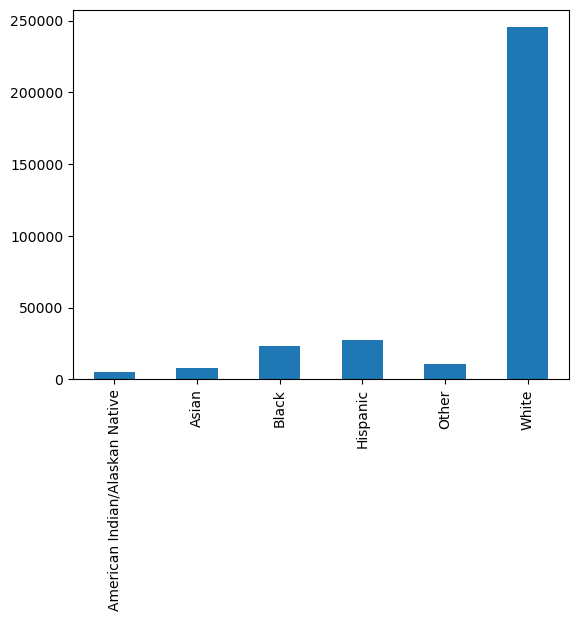

In [100]:
var = 'Race'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### Diabetic

INFOR FOR: Diabetic

Basic info
Type of data: object
Disntinct values: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Number of disntinct values:4
Number of occurences for values:
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64
Percentage of occurence for values:
No                         84.320580
Yes                        12.758799
No, borderline diabetes     2.120421
Yes (during pregnancy)      0.800200
Name: Diabetic, dtype: float64
number of missing values: 0




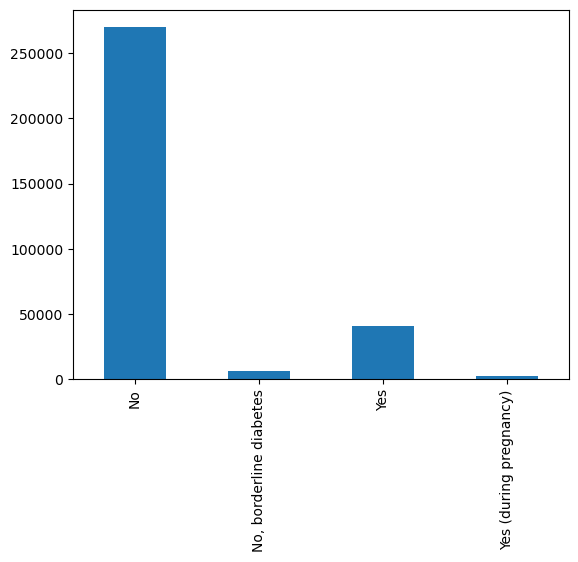

In [101]:
var = 'Diabetic'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### PhysicalActivity

INFOR FOR: PhysicalActivity

Basic info
Type of data: object
Disntinct values: ['Yes' 'No']
Number of disntinct values:2
Number of occurences for values:
Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64
Percentage of occurence for values:
Yes    77.536234
No     22.463766
Name: PhysicalActivity, dtype: float64
number of missing values: 0




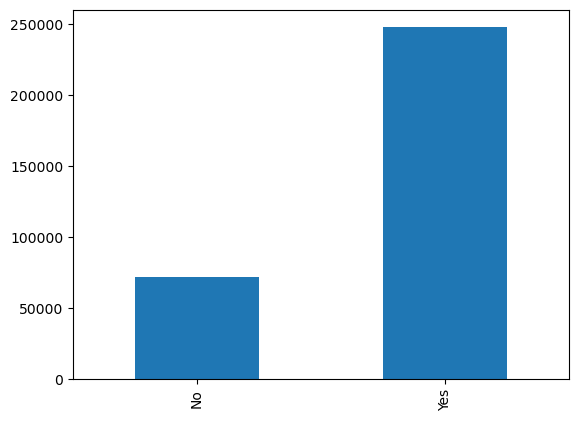

In [102]:
var = 'PhysicalActivity'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### GenHealth

INFOR FOR: GenHealth

Basic info
Type of data: object
Disntinct values: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Number of disntinct values:5
Number of occurences for values:
Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64
Percentage of occurence for values:
Very good    35.603433
Good         29.121468
Excellent    20.901515
Fair         10.843509
Poor          3.530074
Name: GenHealth, dtype: float64
number of missing values: 0




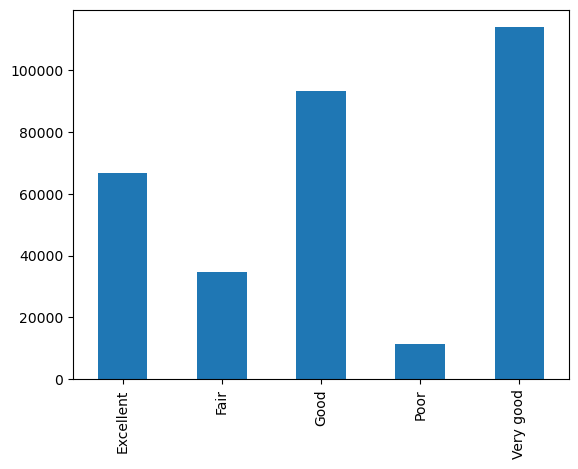

In [103]:
var = 'GenHealth'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### SleepTime

INFOR FOR: SleepTime

Basic info
Type of data: float64
Disntinct values: [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Number of disntinct values:24
Number of occurences for values:
7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64
Percentage of occurence for values:
7.0     30.566769
8.0     30.520177
6.0     20.863678
5.0      5.998843
9.0      5.016026
10.0     2.437812
4.0      2.423428
12.0     0.689504
3.0      0.622899
2.0      0.246408
1.0      0.172298
11.0     0.129771
14.0     0.075986
16.0     0.073797
15.0     0.059100
18.0     0.031895
13.0     0.030332
20.0     0.020013
24.0     0.009381
17.0     0.006567
22.

/tmp/ipykernel_7342/715678476.py:36: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))


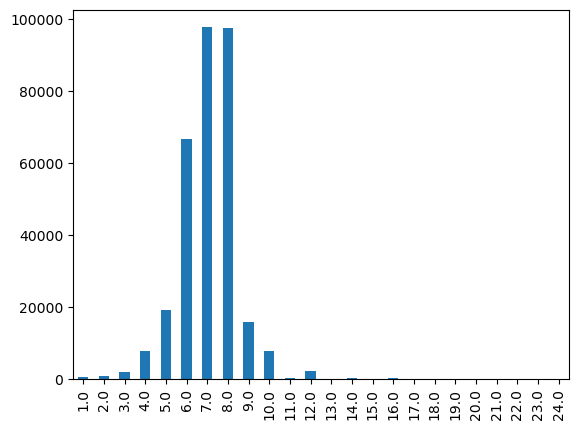

In [104]:
var = 'SleepTime'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### Asthma

INFOR FOR: Asthma

Basic info
Type of data: object
Disntinct values: ['Yes' 'No']
Number of disntinct values:2
Number of occurences for values:
No     276923
Yes     42872
Name: Asthma, dtype: int64
Percentage of occurence for values:
No     86.593912
Yes    13.406088
Name: Asthma, dtype: float64
number of missing values: 0




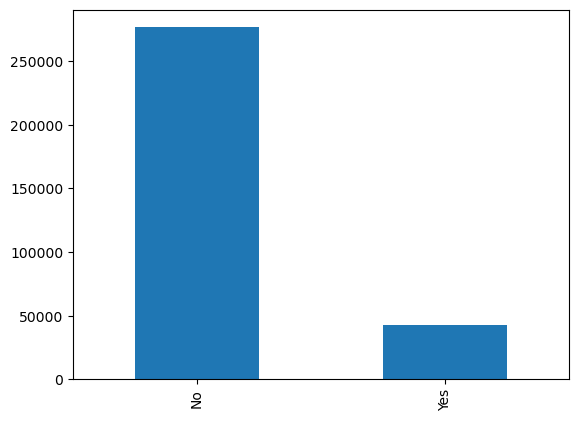

In [105]:
var = 'Asthma'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### KidneyDisease

INFOR FOR: KidneyDisease

Basic info
Type of data: object
Disntinct values: ['No' 'Yes']
Number of disntinct values:2
Number of occurences for values:
No     308016
Yes     11779
Name: KidneyDisease, dtype: int64
Percentage of occurence for values:
No     96.316703
Yes     3.683297
Name: KidneyDisease, dtype: float64
number of missing values: 0




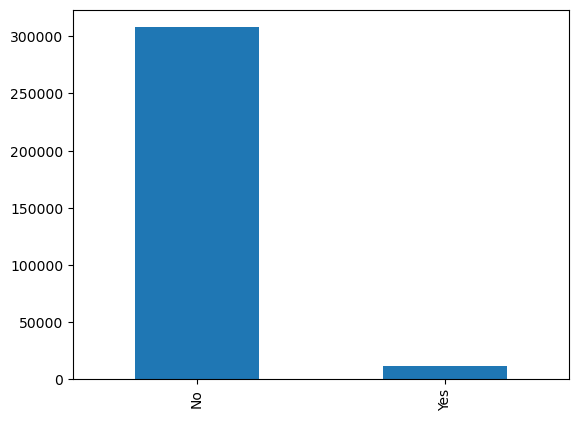

In [106]:
var = 'KidneyDisease'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


##### SkinCancer

INFOR FOR: SkinCancer

Basic info
Type of data: object
Disntinct values: ['Yes' 'No']
Number of disntinct values:2
Number of occurences for values:
No     289976
Yes     29819
Name: SkinCancer, dtype: int64
Percentage of occurence for values:
No     90.675589
Yes     9.324411
Name: SkinCancer, dtype: float64
number of missing values: 0




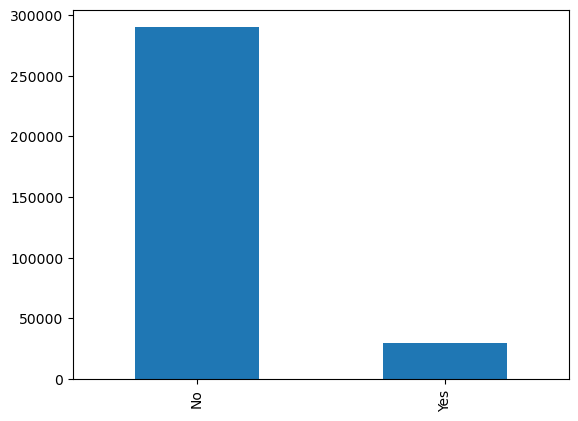

In [107]:
var = 'SkinCancer'
print("INFOR FOR: " + var + '\n')
print('Basic info')
print('Type of data: ' + str(df[var].dtypes))

print('Disntinct values: ', end='')
print(df[var].unique())

print('Number of disntinct values:', end='')
print(str(len(df[var].unique())))

print('Number of occurences for values:')
print(str(df[var].value_counts()))
print('Percentage of occurence for values:')
print(df[var].value_counts(normalize=True) * 100)
print('number of missing values: ' + str(df[var].isnull().sum()))
# plot of data (histogram)
df[var].value_counts().sort_index().plot(kind='bar')

# Information if value is numeric
if(df[var].dtypes == 'float64' or df[var].dtypes == 'int64'):
    # plot of data

    print('\n')
    print('Statistics')
    print('\n')
    print('Minimum Value: ' + str(df[var].min()))
    print('Maximum value: ' + str(df[var].max()))
    print('Range of values: ' + str(df[var].max()-df[var].min()))
    print('Number of zeros: ' + str((df[var] == 0).sum()))
    print('Percentage of zeros: ' + str((df[var] == 0).sum()/(len(df[var]))*100) + '%')
    print('Mean value: ' + str(df[var].mean()))
    print('Meadian value:' + str(df[var].median()))
    print('Standard deviation: ' + str(df[var].std()))
    print('Coefficient of variation: ' + str((df[var].std()/df[var].mean())))
    print('Meadian Absolute Deviation (MAD): ' + str(df[var].mad()))
    print('Skewness: ' + str(df[var].skew()))
    print('Sum of column: ' + str(df[var].sum()))
    print('Variance: ' + str(df[var].var()))
    print('Is variable monotonic: ' + str(df[var].is_monotonic_increasing or df[var].is_monotonic_decreasing))
    print('Percentiles:')
    print("     5th pertentile: " + str(df[var].quantile(0.05)))
    print("     25th pertentile: " + str(df[var].quantile(0.25)))
    print("     50th pertentile: " + str(df[var].quantile(0.50)))
    print("     75th pertentile: " + str(df[var].quantile(0.75)))
    print("     95th pertentile: " + str(df[var].quantile(0.95)))

    # 

# New line for the next variable
print('\n')


## Exploratory Data Analysis

Values for the predicition of the label:

<AxesSubplot:>

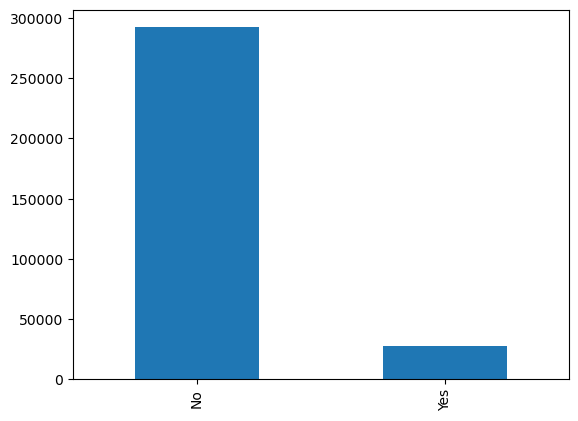

In [108]:
df['HeartDisease'].value_counts()
df['HeartDisease'].value_counts().plot(kind='bar')

Percentage for the different predicition classes:

In [109]:
print('Percentage of occurence for values:')
print(df['HeartDisease'].value_counts(normalize=True) * 100)

Percentage of occurence for values:
No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64


We can see that the label is imbalanced. We will need to fix this later.
From the analysis done previously we also see that there are no missing items on the data set.

### Comparisson between the label and other variables

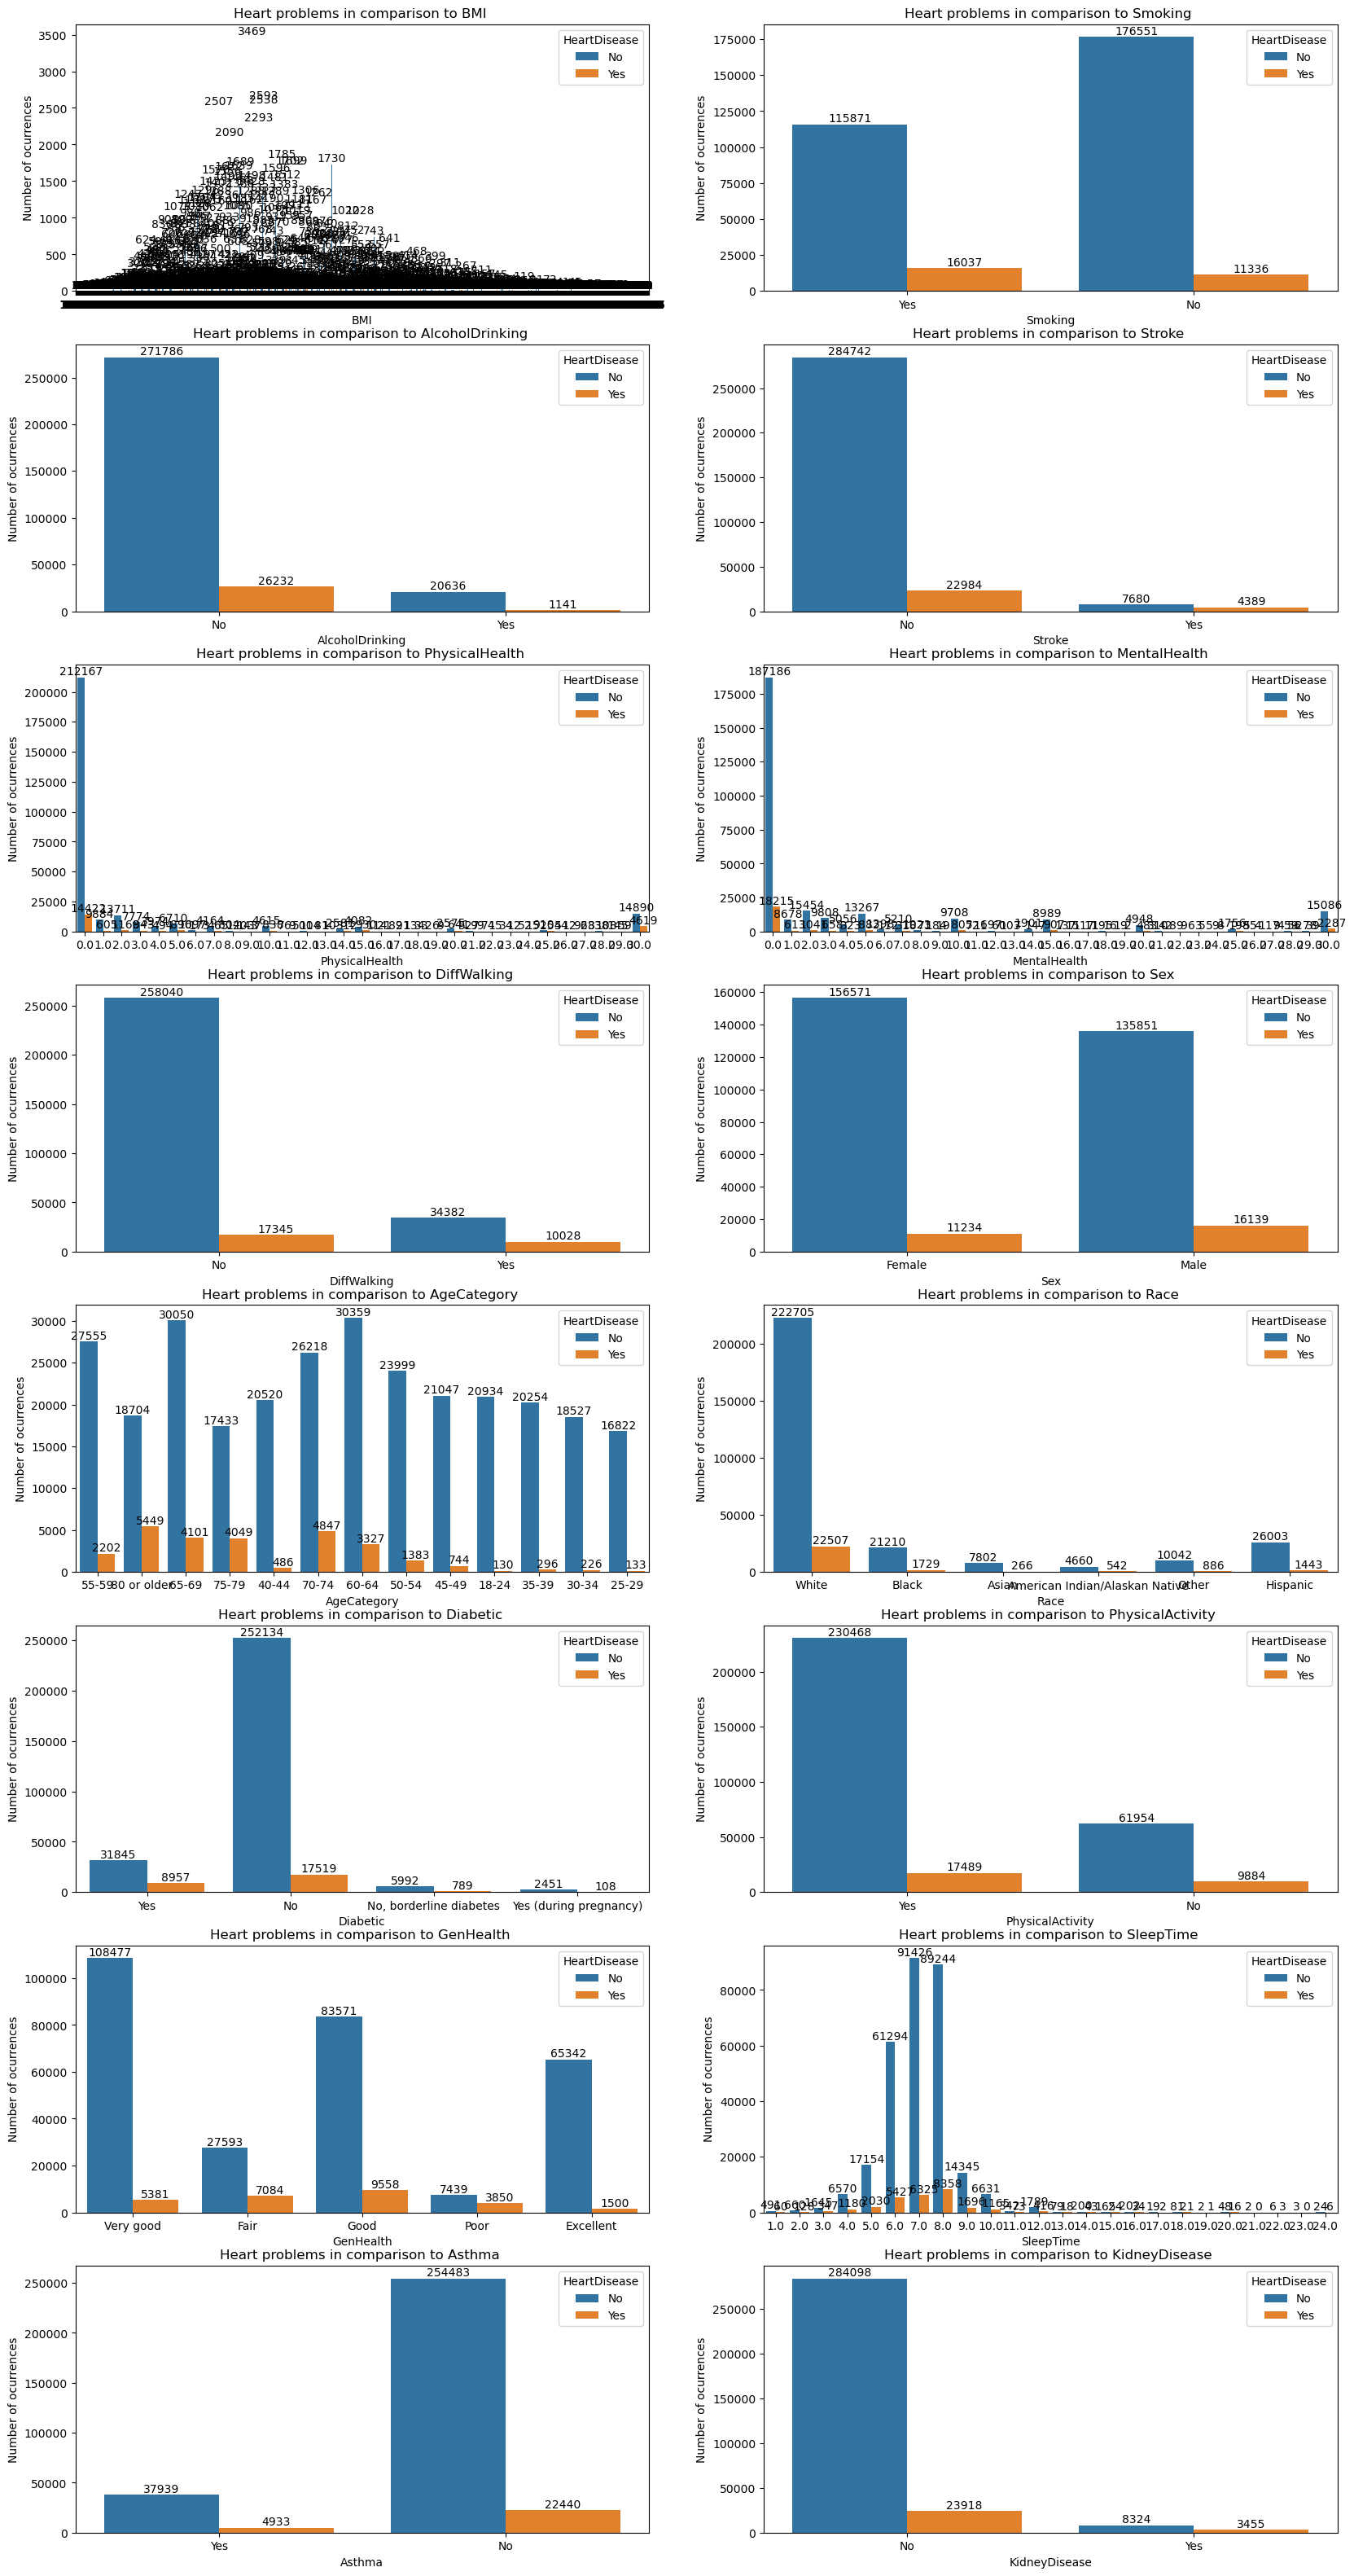

In [110]:
plt.figure(figsize=(20,40))
for graph_count in range(1,len(variable_list)-1):
    var = variable_list[graph_count]
    plt.subplot(8,2,graph_count)
    ax=sb.countplot(x=var,hue='HeartDisease',data=df)
    ax.set_ylabel( 'Number of ocurrences')
    ax.set_title( 'Heart problems in comparison to {} '.format(var))
    for graph_count in ax.containers:
        ax.bar_label(graph_count)
plt.show()

### Correlation Matrix between variables

These will give the correlation matrix only for numerical values, since the majority of the variables in the dataset are categorial this will not help a lot.

/tmp/ipykernel_7342/1926324068.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data=df.corr(),annot=True)


<AxesSubplot:>

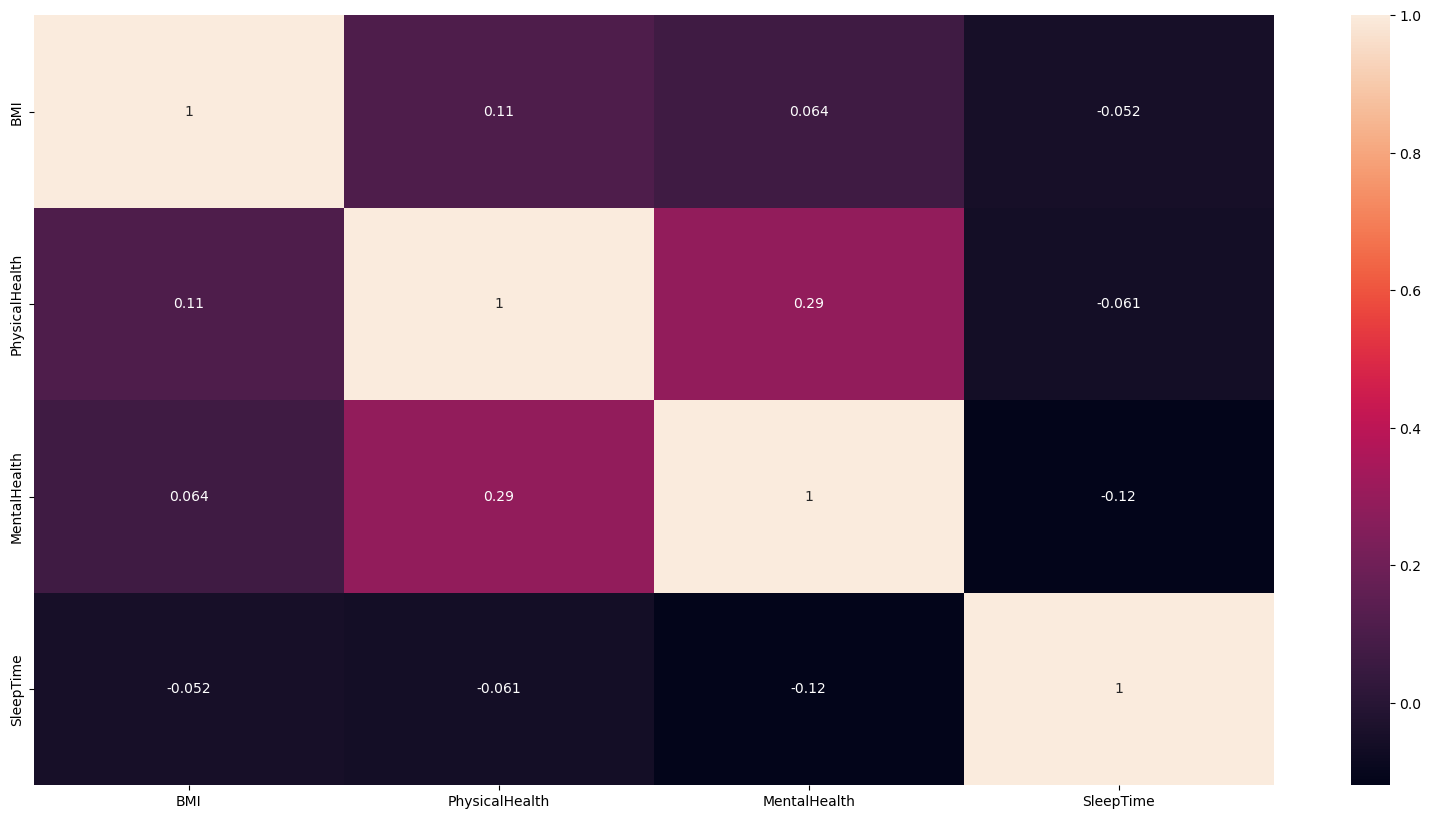

In [111]:
plt.figure(figsize=(20,10))
sb.heatmap(data=df.corr(),annot=True)

Therefore we will have to factorize the features so that we can have a correlation matrix.
The table below was made using the pearson method which is a common way of measuring linear correlation.

<AxesSubplot:>

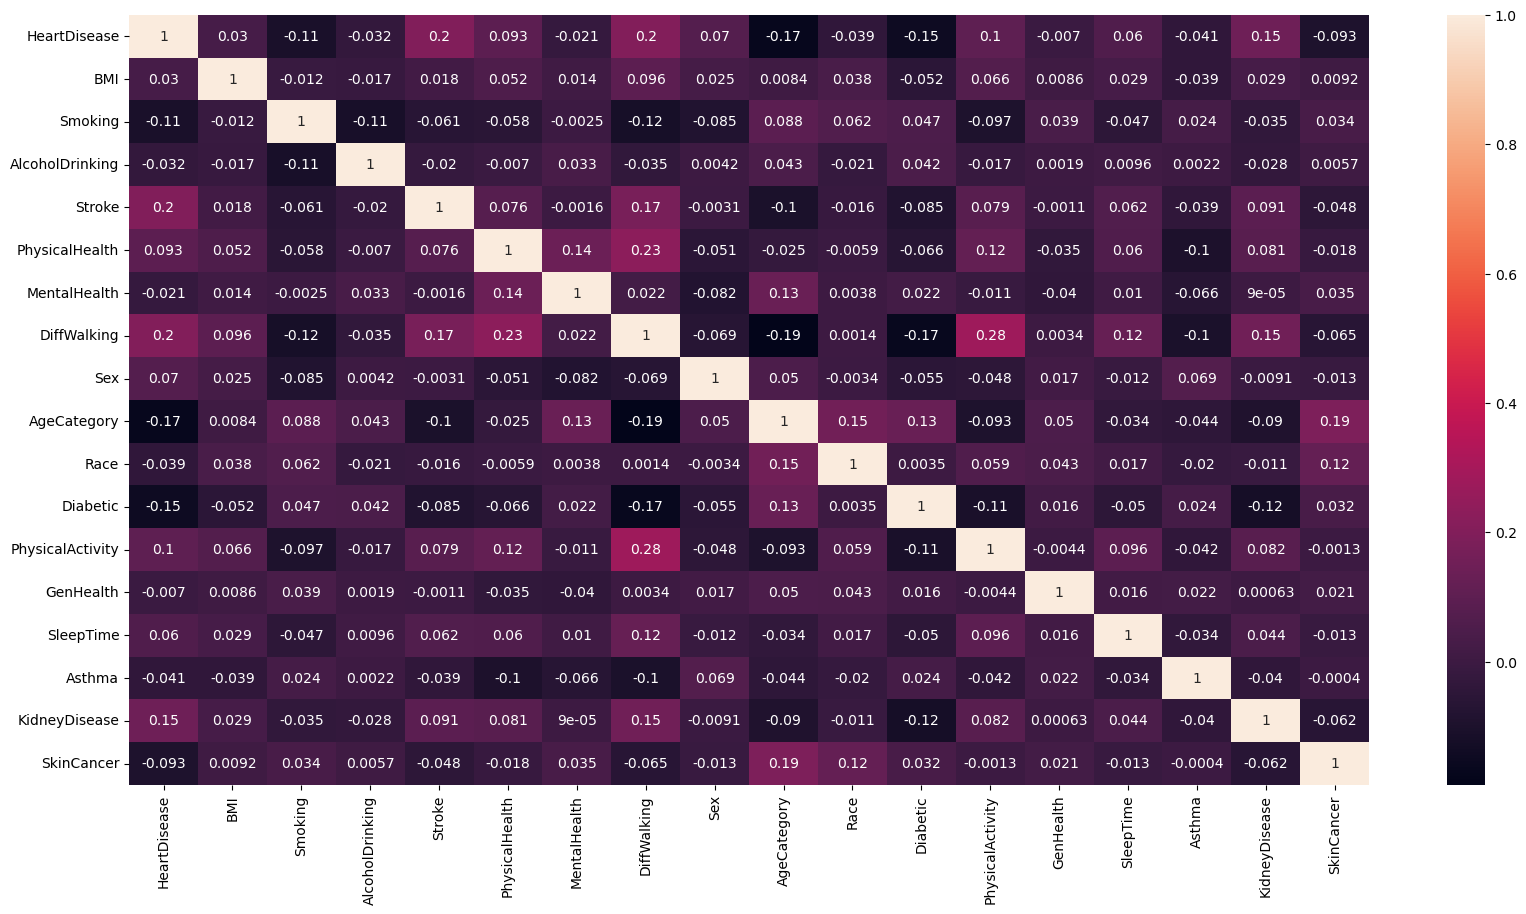

In [112]:

plt.figure(figsize=(20,10))
sb.heatmap(df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1),annot=True)

From this data we can see that the attributes does not have strong correlation between them. Therefore we don't need to drop features that would be conveying the same information.

#### Since Sklearn does not deal very well with categorical value we will encode the categorical values

Since almost all of the categorical values are a simple "Yes" or "no" we can easily use one hot encoding and drop the "no" column from the table.

There are exception, with "race" we will not be dropping any columns. <br/>
With "age category" there are also no columns to be droped after, we could also use ordinal encoding since there is a sense of order with age. <br/>
With "Diabetic" we have 4 categories "yes", "no", "boderline diabetic", "yes, during pregnancy", we will take the safer route and leave all of the one hotencodings. <br>
And finally, with "general health" is a bit more complicated, on one hand it is a categorical value and do have a sense of order with "fair", "good", "very good", health status. We have decided to use one hot encoding since it is a safer decision to make.

##### Label encoding

HeartDisease is what we are trying to predict, therefore we will use the label enconding with it.

In [113]:
le = preprocessing.LabelEncoder()
df['HeartDisease'] = le.fit_transform(df['HeartDisease'])

Below is the result that we got from the enconding, where 0 means "no" and 1 means "yes".

In [114]:
display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


##### One hot encoder - nominal Enconding

In [115]:
df = pd.get_dummies(df, columns=['Sex', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'], drop_first=True)
df = pd.get_dummies(df, columns=['Race', 'Diabetic', 'GenHealth'])
display(df)




,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,Sex_Male,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,3.0,30.0,55-59,5.0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0.0,0.0,80 or older,7.0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,20.0,30.0,65-69,8.0,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0.0,0.0,75-79,6.0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,28.0,0.0,40-44,8.0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,7.0,0.0,60-64,6.0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
319791,0,29.84,0.0,0.0,35-39,5.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0.0,0.0,45-49,6.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0.0,0.0,25-29,12.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


##### One hot encoder - ordinal Encoding

We are transforming age category using an ordinal encoder, therefore we need to be careful that it will be in the correct order.

In [116]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [117]:
age_categories = ['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29']

age_categories = sorted(age_categories)
print(age_categories)

['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']


In [118]:
oe = preprocessing.OrdinalEncoder(categories=[age_categories])

df['AgeCategory'] = oe.fit_transform(df[['AgeCategory']])

display(df)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,Sex_Male,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,3.0,30.0,7.0,5.0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0.0,0.0,12.0,7.0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,20.0,30.0,9.0,8.0,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0.0,0.0,11.0,6.0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,28.0,0.0,4.0,8.0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,7.0,0.0,8.0,6.0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
319791,0,29.84,0.0,0.0,3.0,5.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0.0,0.0,5.0,6.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0.0,0.0,1.0,12.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


#### Remaking the correlation matrix

<AxesSubplot:>

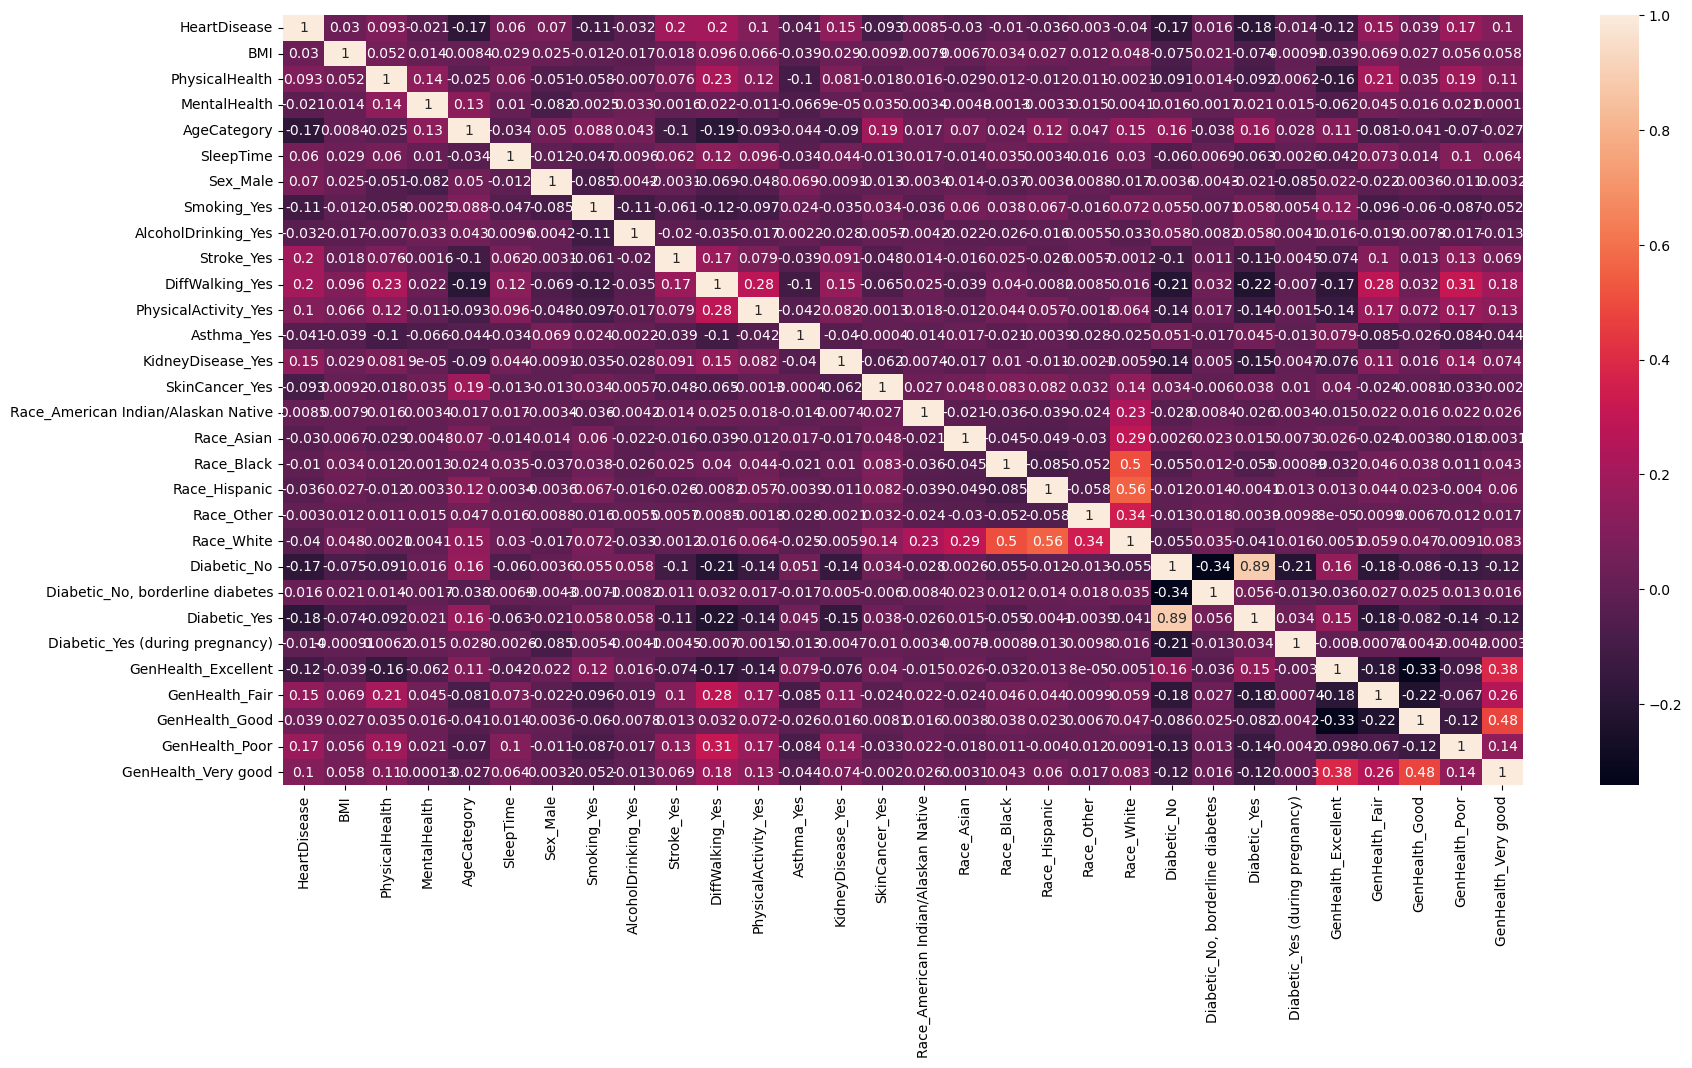

In [119]:
plt.figure(figsize=(20,10))
sb.heatmap(df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1),annot=True)

We still do not have that much correlation. we do have a higher correlation with attributes as "general health good" and "general health very good", but nothing major.

## Preparation to run the models

First we will separate the label from the rest of the table.

In [120]:
features = df.drop('HeartDisease', axis=1)
label = df['HeartDisease']

display(features)
display(label)


,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,Sex_Male,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,3.0,30.0,7.0,5.0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,20.34,0.0,0.0,12.0,7.0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
2,26.58,20.0,30.0,9.0,8.0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,24.21,0.0,0.0,11.0,6.0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,23.71,28.0,0.0,4.0,8.0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,8.0,6.0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
319791,29.84,0.0,0.0,3.0,5.0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
319792,24.24,0.0,0.0,5.0,6.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
319793,32.81,0.0,0.0,1.0,12.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

### Without using sampling

##### Splitting the data

In [121]:
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.30,random_state=1)

#### Naive Bayes

OBS: It might not be the best idea with the ordinal encoder we used.

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     87796
           1       0.24      0.57      0.34      8143

    accuracy                           0.81     95939
   macro avg       0.60      0.70      0.61     95939
weighted avg       0.89      0.81      0.84     95939

ROC AUR: 0.700444955577779


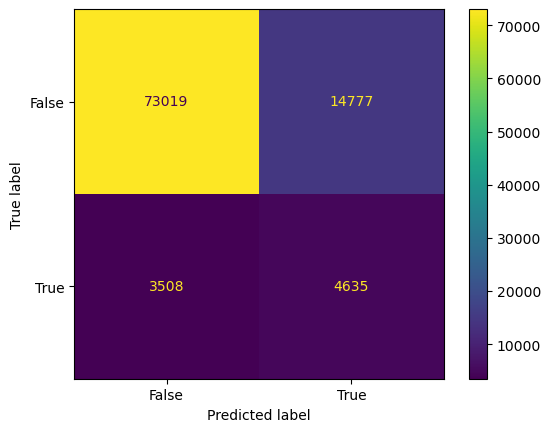

In [135]:
# Training the model
simple_naiveModel = GaussianNB()
simple_naiveModel.fit(x_train,y_train)

# Evaluate the model
y_pred = simple_naiveModel.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
print('ROC AUR: ' + str(metrics.roc_auc_score(y_test,y_pred)))

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_graph.plot()
plt.show()

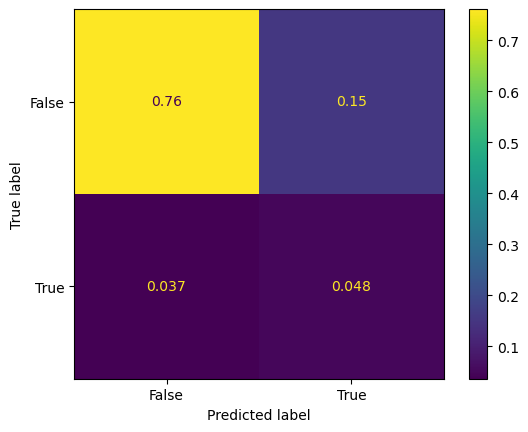

In [136]:
# normalized confusion amtrix
norm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred, normalize='all')
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = norm_confusion_matrix, display_labels = [False, True])
cm_graph.plot()
plt.show()

#### Logistic regression

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87796
           1       0.54      0.11      0.18      8143

    accuracy                           0.92     95939
   macro avg       0.73      0.55      0.57     95939
weighted avg       0.89      0.92      0.89     95939

ROC AUR: 0.5512100244475617


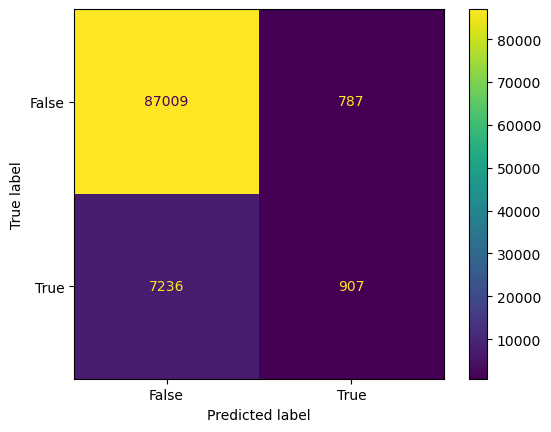

In [134]:
# Training the model
simple_logisticModel = LogisticRegression( solver='lbfgs', max_iter= 1000)
simple_logisticModel.fit(x_train,y_train)

# Evaluate the model
y_pred = simple_logisticModel.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
print('ROC AUR: ' + str(metrics.roc_auc_score(y_test,y_pred)))

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_graph.plot()
plt.show()

In [ ]:
# normalized confusion amtrix
norm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred, normalize='all')
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = norm_confusion_matrix, display_labels = [False, True])
cm_graph.plot()
plt.show()

#### KNN

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87796
           1       0.33      0.09      0.14      8143

    accuracy                           0.91     95939
   macro avg       0.63      0.53      0.54     95939
weighted avg       0.87      0.91      0.88     95939

ROC AUR: 0.5349163105755521


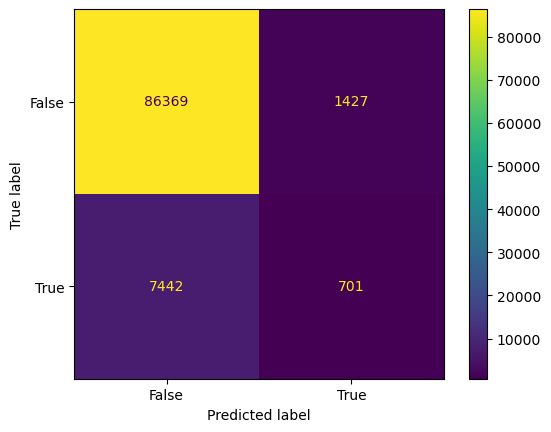

In [138]:
# Training the model
simple_knnModel = KNeighborsClassifier()
simple_knnModel.fit(x_train,y_train)

# Evaluate the model
y_pred = simple_knnModel.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
print('ROC AUR: ' + str(metrics.roc_auc_score(y_test,y_pred)))

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_graph.plot()
plt.show()

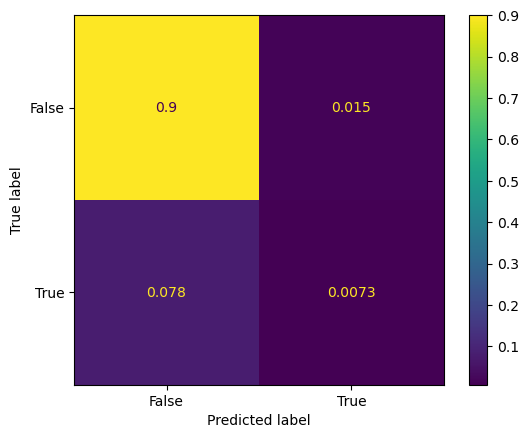

In [139]:
# normalized confusion amtrix
norm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred, normalize='all')
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = norm_confusion_matrix, display_labels = [False, True])
cm_graph.plot()
plt.show()

#### Decision Tree

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     87796
           1       0.24      0.26      0.25      8143

    accuracy                           0.87     95939
   macro avg       0.59      0.59      0.59     95939
weighted avg       0.87      0.87      0.87     95939

ROC AUR: 0.5928865052271067


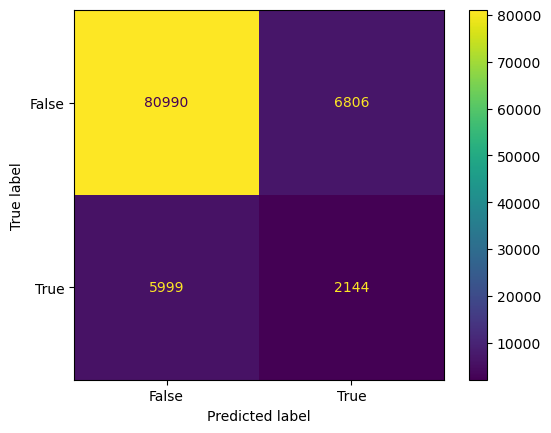

In [140]:
# Training the model
simple_treeModel = DecisionTreeClassifier()
simple_treeModel.fit(x_train,y_train)

# Evaluate the model
y_pred = simple_treeModel.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
print('ROC AUR: ' + str(metrics.roc_auc_score(y_test,y_pred)))

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_graph.plot()
plt.show()

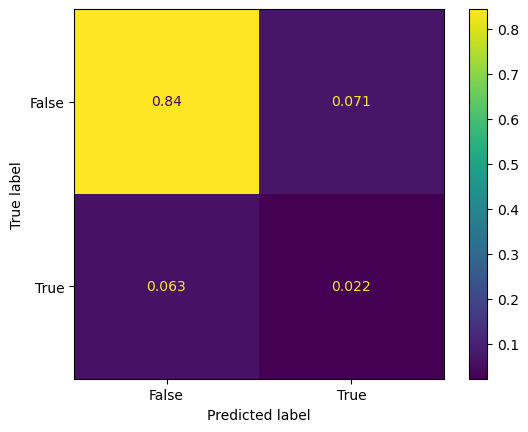

In [141]:
# normalized confusion amtrix
norm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred, normalize='all')
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = norm_confusion_matrix, display_labels = [False, True])
cm_graph.plot()
plt.show()

#### Random Forest

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87796
           1       0.35      0.12      0.18      8143

    accuracy                           0.91     95939
   macro avg       0.64      0.55      0.57     95939
weighted avg       0.87      0.91      0.88     95939

ROC AUR: 0.5505185239378032


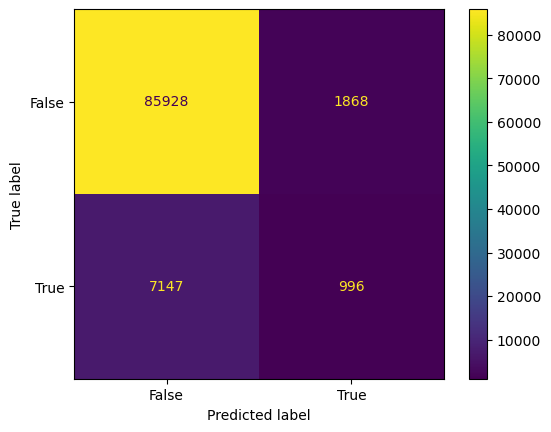

In [142]:
# Training the model
simple_forestModel = RandomForestClassifier()
simple_forestModel.fit(x_train,y_train)

# Evaluate the model
y_pred = simple_forestModel.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
print('ROC AUR: ' + str(metrics.roc_auc_score(y_test,y_pred)))

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_graph.plot()
plt.show()

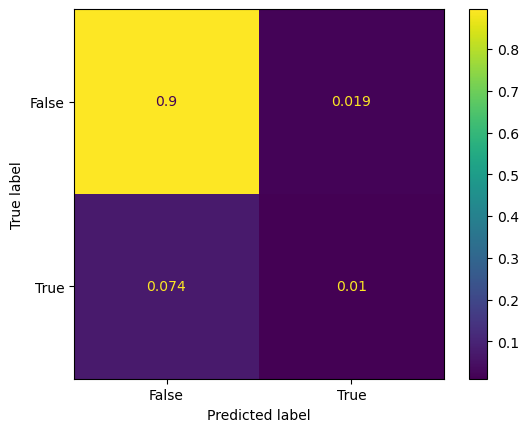

In [143]:
# normalized confusion amtrix
norm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred, normalize='all')
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = norm_confusion_matrix, display_labels = [False, True])
cm_graph.plot()
plt.show()

#### Neural Networks

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87796
           1       0.55      0.10      0.16      8143

    accuracy                           0.92     95939
   macro avg       0.74      0.54      0.56     95939
weighted avg       0.89      0.92      0.89     95939

ROC AUR: 0.5440490340588201


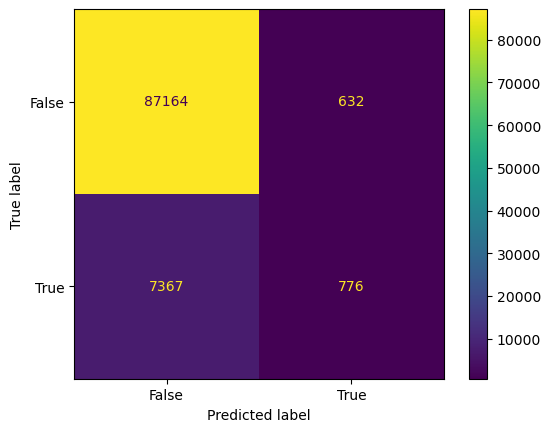

In [144]:
# Training the model
simple_nnModel = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
simple_nnModel.fit(x_train,y_train)

# Evaluate the model
y_pred = simple_nnModel.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
print('ROC AUR: ' + str(metrics.roc_auc_score(y_test,y_pred)))

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_graph.plot()
plt.show()

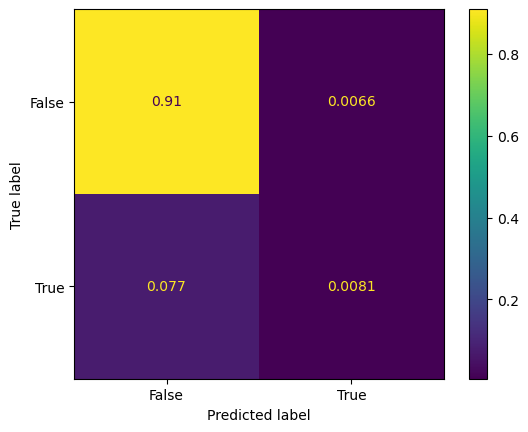

In [145]:
# normalized confusion amtrix
norm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred, normalize='all')
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = norm_confusion_matrix, display_labels = [False, True])
cm_graph.plot()
plt.show()

Now we do the same thing using crossvalidation! (for the 3 types)

### OverSampling

### UnderSampling

## Results